#데이터 불러오기

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/MyDrive/기계학습 과제/프로젝트2/train.csv')

In [3]:
data.head()

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_amean_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile80.0_mean,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_mean,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope_mean,loudness_sma3_amean_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_percentile20.0_mean,loudness_sma3_percentile50.0_mean,loudness_sma3_percentile80.0_mean,loudness_sma3_pctlrange0-2_mean,loudness_sma3_meanRisingSlope_mean,loudness_sma3_stddevRisingSlope_mean,loudness_sma3_meanFallingSlope_mean,loudness_sma3_stddevFallingSlope_mean,spectralFlux_sma3_amean_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_amean_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_amean_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,mfcc4_sma3_stddevNorm_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,...,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_amean_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3frequency_sma3nz_amean_max,F3frequency_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_amean_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,F3amplitudeLogRelF0_sma3nz_stddevNorm_max,alphaRatioV_sma3nz_amean_max,alphaRatioV_sma3nz_stddevNorm_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_amean_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc2V_sma3nz_stddevNorm_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,hammarbergIndexUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,spectralFluxUV_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,StddevUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max,label
0,0.159302,0.001206,0.095556,0.103968,0.241841,0.015937,0.380635,24.365636,0.175620,21.451660,23.824941,26.860989,5.409329,178.302275,118.805772,71.780979,60.595704,1.120236,0.456544,0.679286,1.030189,1.554274,0.874988,11.056342,5.862386,7.338043,4.313646,0.626464,0.695773,21.477432,0.693588,-0.327011,2.948707,2.301753,0.621157,-0.636670,1.357991,0.041140,1.294767,1.411157,...,0.013287,1553.790611,13.057997,17276.461014,0.000760,15273.899997,0.010718,1454.616107,0.333077,11.872866,0.153309,17.167801,0.121265,0.000749,2.103438e+01,0.000062,2.359656,0.082971,0.056775,38.786267,0.067508,39.441458,166082.362816,76.087625,93.992936,77.820486,36532.756730,19.835802,40.867942,0.001236,0.000041,0.073747,3.247842,1.524696,0.038395,0.007741,0.009176,0.002994,17.493596,0
1,0.078909,0.000098,0.097341,0.111471,0.152525,0.038076,0.521042,20.450413,0.180559,17.321590,20.874958,23.396257,6.074668,137.679613,87.802155,67.882583,52.059239,0.622723,0.416345,0.396978,0.559901,0.836382,0.439405,4.619568,2.419374,2.571888,1.489682,0.307432,0.502883,25.386675,0.305130,2.699263,1.668620,4.992532,1.532773,3.519948,2.028082,0.065575,1.384110,1.419527,...,0.005533,491.589328,0.276725,20300.495507,0.000696,10802.614674,0.008120,445.160892,0.125321,4.298156,0.011688,8.891616,0.006371,0.000527,1.106866e+07,0.000032,212.740090,0.012751,0.033280,24.012308,0.017846,21.320284,928.943139,41.933796,520.846650,41.720618,388.881196,15.238695,47.110117,0.000494,0.000053,

In [41]:
data.describe()

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_amean_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile80.0_mean,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_mean,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope_mean,loudness_sma3_amean_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_percentile20.0_mean,loudness_sma3_percentile50.0_mean,loudness_sma3_percentile80.0_mean,loudness_sma3_pctlrange0-2_mean,loudness_sma3_meanRisingSlope_mean,loudness_sma3_stddevRisingSlope_mean,loudness_sma3_meanFallingSlope_mean,loudness_sma3_stddevFallingSlope_mean,spectralFlux_sma3_amean_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_amean_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_amean_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,mfcc4_sma3_stddevNorm_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,...,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_amean_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3frequency_sma3nz_amean_max,F3frequency_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_amean_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,F3amplitudeLogRelF0_sma3nz_stddevNorm_max,alphaRatioV_sma3nz_amean_max,alphaRatioV_sma3nz_stddevNorm_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_amean_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc2V_sma3nz_stddevNorm_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,hammarbergIndexUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,spectralFluxUV_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,StddevUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max,label
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,...,405.000000,405.000000,405.000000,4.050000e+02,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,4.050000e+02,405.000000,405.000000,405.000000,4.050000e+02,405.000000,4.050000e+02,405.000000,405.000000,405.000000,405.000000,405.000000,4.050000e+02,405.000000,4.050000e+02,405.000000,4.050000e+02,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,0.128547,0.001497,0.103264,0.254882,0.168895,0.049551,0.292277,29.346558,0.198189,25.019881,29.750026,33.620952,8.601071,208.711646,132.711805,90.526609,69.018507,1.258115,0.515119,0.713753,1.126770,1.789339,1.075586,13.890679,7.027224,8.748301,5.267168,0.969419,0.695642,23.821208,0.179616,-1.317826,-1.443551,9.544733,6.442474,-4.798155,-7.102119,0.056249,1.386572,1.333257,...,0.016716,1162.870068,56.391881,7.511756e+04,0.000661,26806.370329,0.017861,1097.405498,9.570555,21.781083,3.137460e+05,30.638778,117.956872,0.001032,1.116691e+05,0.000

#data split

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
seed = 43

In [5]:
X = data.drop(['label'], axis=1)
y = np.array(data[['label']])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [7]:
test = pd.read_csv('/content/drive/MyDrive/기계학습 과제/프로젝트2/X_test.csv')

#정규화

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#모델별 성능 비교

In [14]:
from sklearn.metrics import classification_report

##SVM

In [22]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)
y_pred = svm_clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        63
           1       0.75      0.78      0.77        59

    accuracy                           0.77       122
   macro avg       0.77      0.77      0.77       122
weighted avg       0.77      0.77      0.77       122



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Xgboost

In [23]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train, y_train.ravel())
xgb_pred = xgb.predict(X_test)

print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        63
           1       0.76      0.69      0.73        59

    accuracy                           0.75       122
   macro avg       0.75      0.74      0.74       122
weighted avg       0.75      0.75      0.75       122



##Logsitc Regression

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train.ravel())
y_pred = lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71        63
           1       0.70      0.66      0.68        59

    accuracy                           0.70       122
   macro avg       0.70      0.70      0.70       122
weighted avg       0.70      0.70      0.70       122



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        63
           1       0.79      0.83      0.81        59

    accuracy                           0.81       122
   macro avg       0.81      0.81      0.81       122
weighted avg       0.81      0.81      0.81       122



##MLP Classifier

In [20]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train.ravel())
y_pred = mlp.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        63
           1       0.77      0.69      0.73        59

    accuracy                           0.75       122
   macro avg       0.76      0.75      0.75       122
weighted avg       0.76      0.75      0.75       122



##Keras

In [ ]:
from keras import models
from keras import layers
import tensorflow as tf

model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(383,)))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_split=0.3, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
7/7 [==============================] - 1s 39ms/step - loss: 0.7024 - accuracy: 0.5511 - val_loss: 0.7028 - val_accuracy: 0.4588
Epoch 2/25
7/7 [==============================] - 0s 14ms/step - loss: 0.5978 - accuracy: 0.6448 - val_loss: 0.6171 - val_accuracy: 0.6706
Epoch 3/25
7/7 [==============================] - 0s 12ms/step - loss: 0.5524 - accuracy: 0.7305 - val_loss: 0.5888 - val_accuracy: 0.6471
Epoch 4/25
7/7 [==============================] - 0s 16ms/step - loss: 0.5389 - accuracy: 0.7456 - val_loss: 0.6224 - val_accuracy: 0.6706
Epoch 5/25
7/7 [==============================] - 0s 13ms/step - loss: 0.4927 - accuracy: 0.7985 - val_loss: 0.5708 - val_accuracy: 0.7294
Epoch 6/25
7/7 [==============================] - 0s 12ms/step - loss: 0.4741 - accuracy: 0.7929 - val_loss: 0.5454 - val_accuracy: 0.7529
Epoch 7/25
7/7 [==============================] - 0s 12ms/step - loss: 0.4715 - accuracy: 0.7839 - val_loss: 0.6170 - val_accuracy: 0.6471
Epoch 8/25
7/7 [===========

In [ ]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=2)

4/4 - 0s - loss: 0.5146 - accuracy: 0.7787


##Gradient Boosting

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gr = GradientBoostingClassifier(learning_rate=0.01)
gr.fit(X_train,y_train)
gr_pred = gr.predict(X_test)

print(classification_report(y_test, gr_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.72      0.81      0.76        63
           1       0.76      0.66      0.71        59

    accuracy                           0.74       122
   macro avg       0.74      0.74      0.74       122
weighted avg       0.74      0.74      0.74       122



##그래프 그리기

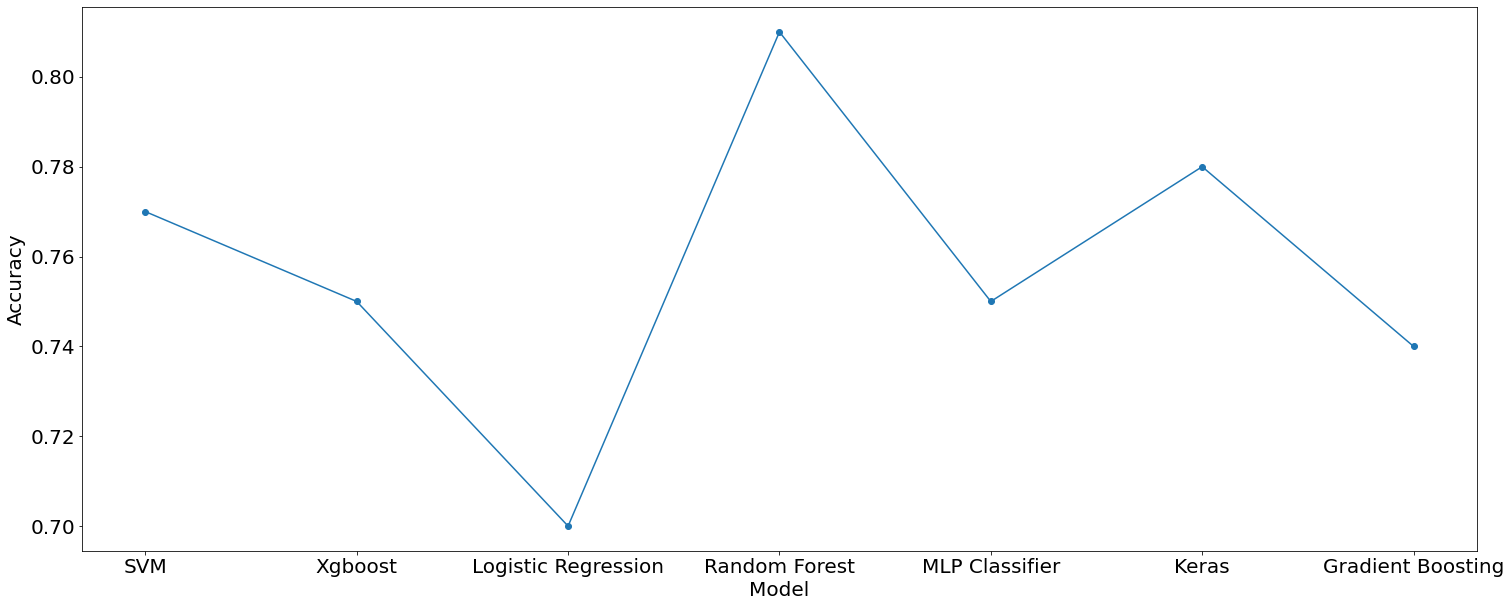

In [40]:
import matplotlib.pyplot as plt


x_values = ['SVM', 'Xgboost', 'Logistic Regression', 'Random Forest', 'MLP Classifier', 'Keras','Gradient Boosting']
y_values = [0.77, 0.75, 0.70, 0.81, 0.75, 0.78, 0.74]
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)  
plt.rc('ytick', labelsize=20)
plt.figure(figsize=(25,10))
plt.plot(x_values, y_values, marker='o')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

#Grid Search -> for문

In [25]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'eta' : [0.01, 0.02, 0.1],
          'reg_alpha' : [0.01, 0.02, 0.1],
          'reg_lambda' : [0.01, 0.02, 0.1],
          'max_depth' : [2, 3, 4, 5]}

xgb_grid = GridSearchCV(xgb, params, cv=5)
xgb_grid.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'eta': [0.01, 0.02, 0.1], 'max_depth': [2, 3, 4, 5],
                         'reg_alpha': [0.01, 0.02, 0.1],
                         'reg_lambda': [0.

In [ ]:
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

{'eta': 0.01, 'max_depth': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.01}
0.8302005012531328


In [ ]:
xgb_grid.score(X_test, y_test)

0.7540983606557377

In [ ]:
result = pd.DataFrame(xgb_grid.cv_results_)

In [ ]:
result = result[['param_eta', 'param_max_depth', 'param_reg_alpha', 'param_reg_lambda', 'params', 'mean_test_score']]
result = result.sort_values('mean_test_score', ascending=False)

In [ ]:
result

,param_eta,param_max_depth,param_reg_alpha,param_reg_lambda,params,mean_test_score
87,0.1,3,0.1,0.01,"{'eta': 0.1, 'max_depth': 3, 'reg_alpha': 0.1,...",0.830201
51,0.02,3,0.1,0.01,"{'eta': 0.02, 'max_depth': 3, 'reg_alpha': 0.1...",0.830201
15,0.01,3,0.1,0.01,"{'eta': 0.01, 'max_depth': 3, 'reg_alpha': 0.1...",0.830201
33,0.01,5,0.1,0.01,"{'eta': 0.01, 'max_depth': 5, 'reg_alpha': 0.1...",0.823246
69,0.02,5,0.1,0.01,"{'eta': 0.02, 'max_depth': 5, 'reg_alpha': 0.1...",0.823246
...,...,...,...,...,...,...
37,0.02,2,0.01,0.02,"{'eta': 0.02, 'max_depth': 2, 'reg_alpha': 0.0...",0.787845
1,0.01,2,0.01,0.02,"{'eta': 0.01, 'max_depth': 2, 'reg_alpha': 0.0...",0.787845
75,0.1,2,0.02,0.01,"{'eta': 0.1, 'max_depth': 2, 'reg_alpha': 0.02...",0.787782
3,0.01,2,0.02,0.01,"{'eta': 0.01, 'max_depth': 2, 'reg_alpha': 0.0...",0.787782


In [ ]:
eta = result['param_eta'].values
depth = result['param_max_depth'].values
alpha = result['param_reg_alpha'].values
lam = result['param_reg_lambda'].values

In [ ]:
accuracy = {}

for i in range(108):
  model = XGBClassifier(eta=eta[i], reg_alpha=alpha[i], reg_lambda=lam[i], max_depth=depth[i])
  model.fit(X_train, y_train)
  accuracy_temp = model.score(X_test, y_test)
  accuracy[i] = accuracy_temp

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracy = sorted(accuracy.items(), key=lambda x : x[1], reverse=True)

##단일모델

In [ ]:
xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', eta=0.01, reg_alpha=0.01, reg_lambda=0.01, max_depth=2)
xgb.fit(X_train, y_train.ravel())

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(xgb.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(xgb.score(X_test, y_test)))

훈련 세트 정확도: 0.996
테스트 세트 정확도: 0.820


In [ ]:
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        63
           1       0.81      0.81      0.81        59

    accuracy                           0.82       122
   macro avg       0.82      0.82      0.82       122
weighted avg       0.82      0.82      0.82       122



##plot_importance

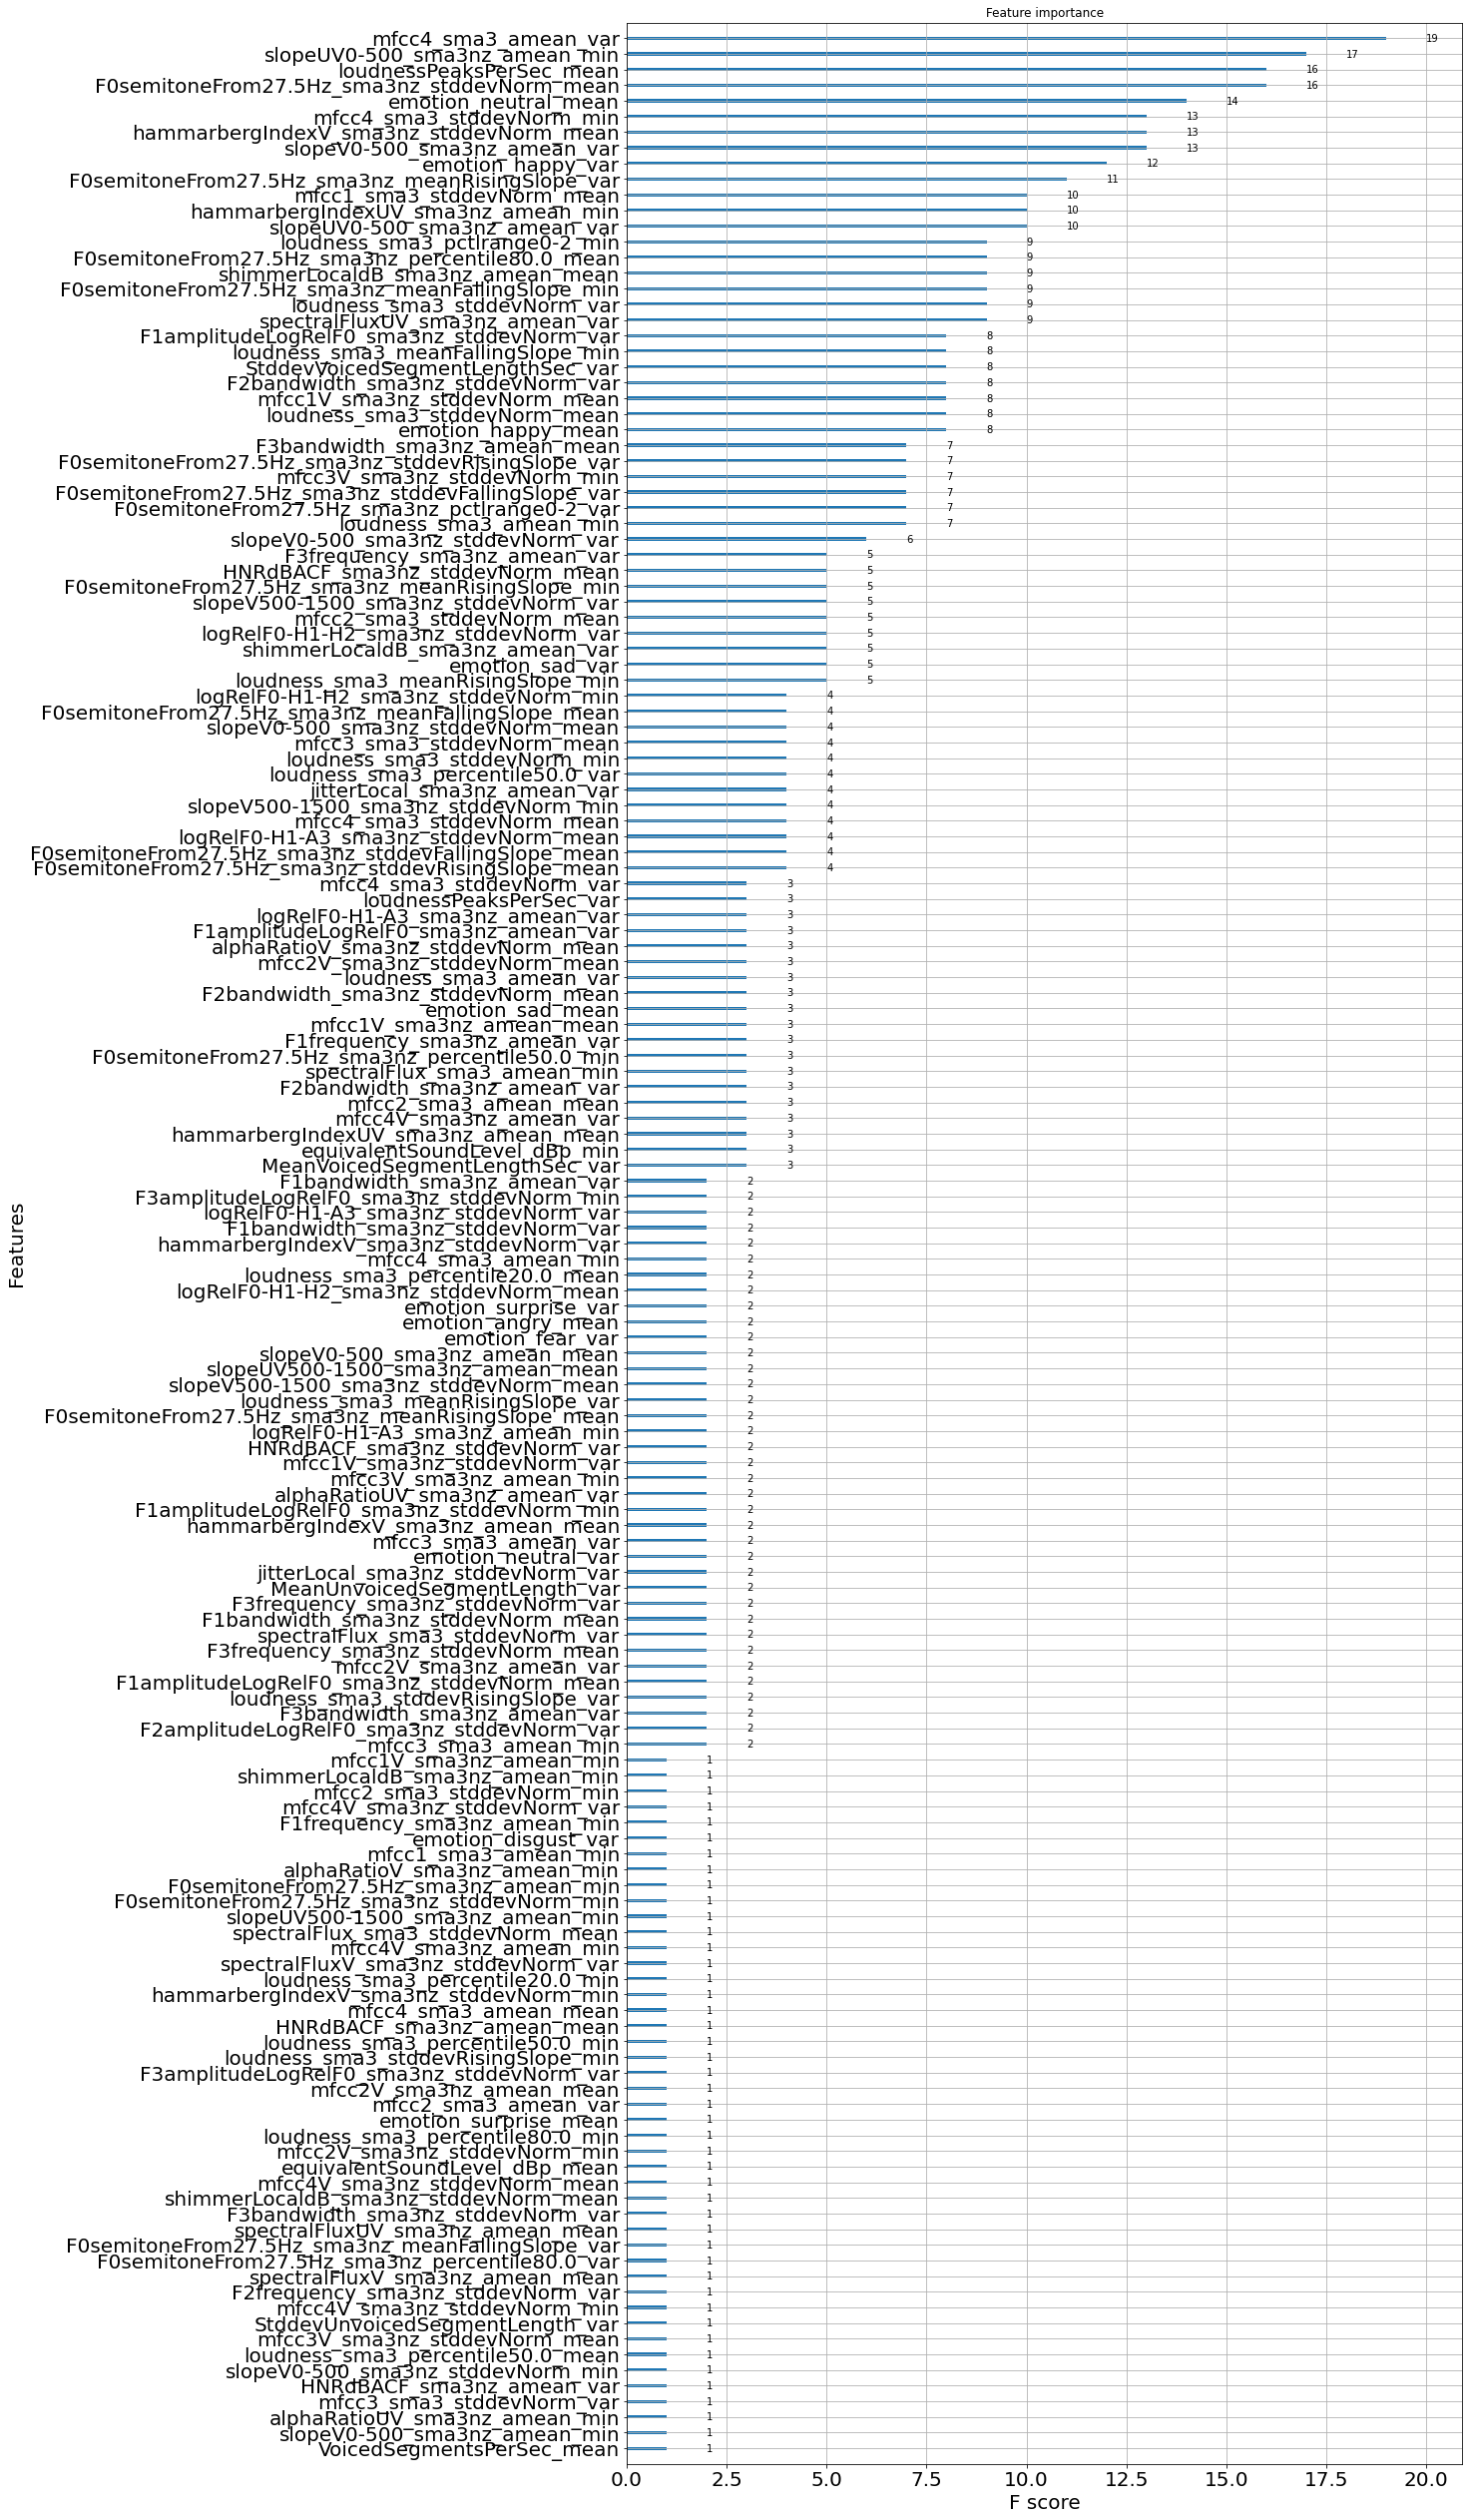

In [48]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(15, 45))
plot_importance(xgb, ax=ax)

#Voting 기반으로 코드 구현

In [ ]:
voting_proba_pre = []
voting_pred_pre = []
voting_proba_test = []
voting_pred_test = []

for i in range(10) : 
  index = accuracy[i][0]
  model = XGBClassifier(eta=eta[index], reg_alpha=alpha[index], reg_lambda=lam[index], max_depth=depth[index])
  model.fit(X_train, y_train.ravel())
  print("모델 테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
  #test set 예측
  proba = model.predict_proba(test)
  pred = model.predict(test)
  voting_proba_test.append(proba)
  voting_pred_test.append(pred)
  #split test 예측
  proba = model.predict_proba(X_test)
  pred = model.predict(X_test)
  voting_proba_pre.append(proba)
  voting_pred_pre.append(pred)

모델 테스트 세트 정확도: 0.820
모델 테스트 세트 정확도: 0.820
모델 테스트 세트 정확도: 0.820
모델 테스트 세트 정확도: 0.811
모델 테스트 세트 정확도: 0.811
모델 테스트 세트 정확도: 0.811
모델 테스트 세트 정확도: 0.811
모델 테스트 세트 정확도: 0.811
모델 테스트 세트 정확도: 0.811
모델 테스트 세트 정확도: 0.803


In [ ]:
#확률 기반

def probability(array):
  voting_proba = []
  for i in range(len(array[0])):
    zero_p = []
    one_p = []
    for j in range(10):
      zero_p.append(array[j][i][0])
      one_p.append(array[j][i][1])

    max_zero = max(zero_p)
    max_one = max(one_p)

    if max_zero >= max_one:
      voting_proba.append(0) 
    else:
      voting_proba.append(1)

  return np.array(voting_proba)

In [ ]:
prob = probability(voting_proba_pre)

In [ ]:
print(classification_report(y_test, prob))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        63
           1       0.80      0.83      0.82        59

    accuracy                           0.82       122
   macro avg       0.82      0.82      0.82       122
weighted avg       0.82      0.82      0.82       122



In [ ]:
prob_test = probability(voting_proba_test)

In [ ]:
#label 기반

def label(array):
  voting_pred = []

  for i in range(len(array[0])):
    total_pred = []
    for j in range(10):
      total_pred.append(array[j][i])
    cnt_zero = total_pred.count(0)
    cnt_one = total_pred.count(1)
    
    if cnt_zero > cnt_one:
      voting_pred.append(0) 
    elif cnt_zero <= cnt_one:
      voting_pred.append(1)

  return np.array(voting_pred)

In [ ]:
pred = label(voting_pred_pre)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82        63
           1       0.80      0.81      0.81        59

    accuracy                           0.81       122
   macro avg       0.81      0.81      0.81       122
weighted avg       0.81      0.81      0.81       122



In [ ]:
pred_test = label(voting_pred_test)

In [ ]:
pd.DataFrame(pred_test).to_csv('pred_test.csv', header=None)    #89.1089
pd.DataFrame(prob_test).to_csv('prob_test.csv', header=None)    #89.1089